<h1 style="color:navy;">Alzheimer's Disease Prediction – Data Science Project</h1>


In [11]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


<span style="color:darkred; font-size:28px; font-weight:bold;">1. Business Understanding</span>

<span style="color:slateblue; font-size:16px;">
The goal of this project is to predict whether a patient has Alzheimer's disease using health, lifestyle, clinical, and demographic information. Accurate early classification can help clinicians and researchers optimize patient care and treatment strategies.
</span>


<span style="color:darkred; font-size:28px; font-weight:bold;">2. Data Acquisition</span>

<span style="color:slateblue; font-size:16px;">
The dataset is downloaded from Kaggle using KaggleHub. It contains synthetic clinical records for 2,149 patients, including demographic, lifestyle, and medical features relevant to Alzheimer's disease analysis.
</span>



In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/caitlinleonard/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


<span style="color:darkred; font-size:28px; font-weight:bold;">3. Data Exploration</span>

<span style="color:slateblue; font-size:16px;">
In this step, we explore the Alzheimer's dataset to understand its columns, data types, missing values, and feature distributions. Summary statistics and visualizations help us detect patterns and inform the preprocessing steps for modeling.
</span>



   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

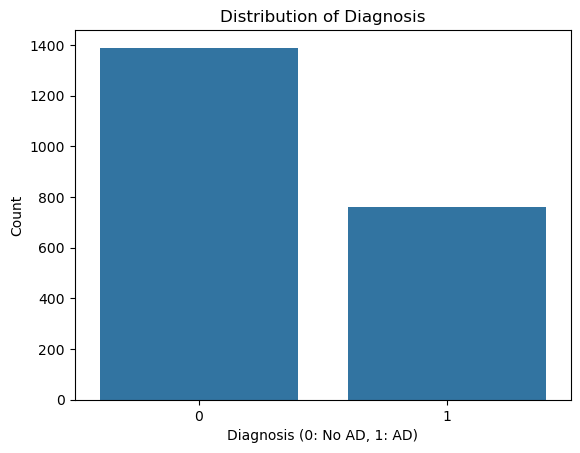

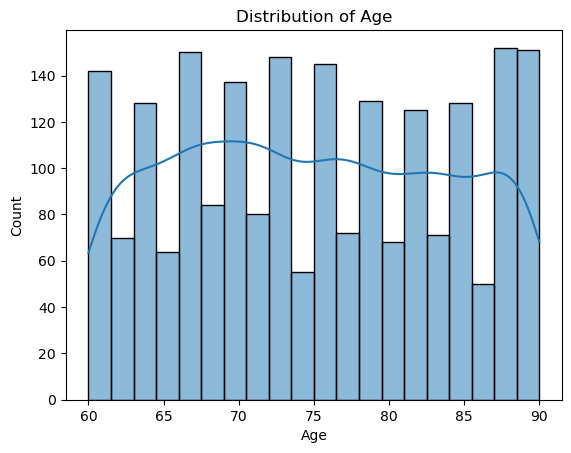

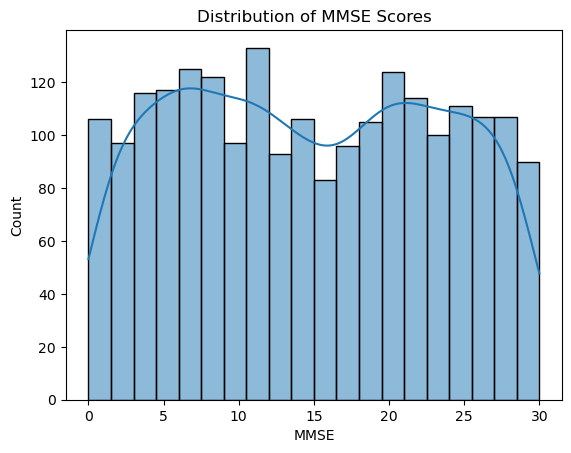

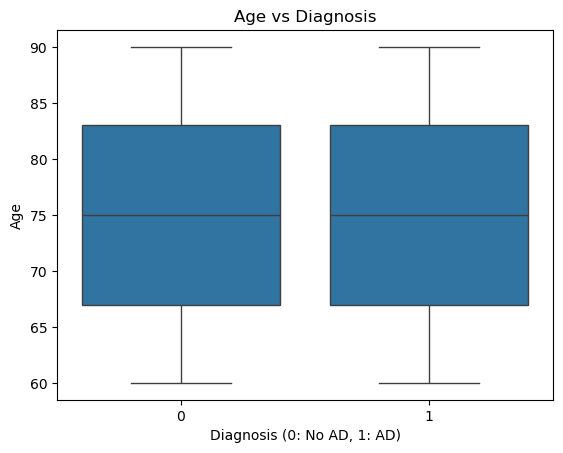

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('alzheimers_disease_data.csv')

# Basic info
print(df.head())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Target distribution (Diagnosis)
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0: No AD, 1: AD)')
plt.ylabel('Count')
plt.show()

# Distribution of Age
plt.figure()
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of MMSE Scores
plt.figure()
sns.histplot(df['MMSE'], kde=True, bins=20)
plt.title('Distribution of MMSE Scores')
plt.xlabel('MMSE')
plt.ylabel('Count')
plt.show()

# Relationship between Age and Diagnosis
plt.figure()
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Age vs Diagnosis')
plt.xlabel('Diagnosis (0: No AD, 1: AD)')
plt.ylabel('Age')
plt.show()


<span style="color:darkred; font-size:28px; font-weight:bold;">4. Data Preparation</span>

<span style="color:slateblue; font-size:16px;">
In this step, we prepare the Alzheimer's dataset for modeling. This includes handling missing values, encoding categorical variables, dropping unnecessary columns, and scaling numerical features.
</span>


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('alzheimers_disease_data.csv')

# 1. Drop confidential or non-informative columns
df = df.drop(columns=['DoctorInCharge', 'PatientID'])

# 2. Handle missing values (if any)
df = df.fillna(df.median(numeric_only=True))  # or use other imputation as needed

# 3. Encode categorical variables
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']
df[categorical_cols] = df[categorical_cols].astype('category')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Scale numerical features
num_cols = df.select_dtypes(include='number').columns.drop('Diagnosis')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())


        Age       BMI   Smoking  AlcoholConsumption  PhysicalActivity  \
0 -0.212368 -0.655225 -0.636784            0.565923          0.492525   
1  1.567757 -0.114751 -0.636784           -0.954895          0.945093   
2 -0.212368 -1.366428 -0.636784            1.653006          1.023896   
3 -0.101111  0.851625  1.570391            0.376930          1.227995   
4  1.567757 -0.961607 -0.636784            1.461793          0.486696   

   DietQuality  SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
0    -1.253593      1.119918                -0.580753              -0.410573   
1    -1.538442      0.056836                -0.580753              -0.410573   
2    -1.088855      1.487380                 1.721901              -0.410573   
3     0.839804      0.760833                -0.580753              -0.410573   
4    -1.443293     -0.824566                -0.580753              -0.410573   

   Diabetes  ...  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0  2.37

<span style="color:darkred; font-size:28px; font-weight:bold;">PCA & KMeans: Exploratory Insights</span>

<span style="color:slateblue; font-size:16px;"> <ul> <li><b>PCA:</b> The projection onto the first two principal components did not show a clear separation between Alzheimer's and non-Alzheimer's cases.</li> <li><b>KMeans:</b> Unsupervised clustering did not recover distinct groups that correspond to the disease diagnosis.</li> </ul> <b>Conclusion:</b> <br> Class differences are subtle and not captured by these unsupervised techniques, so supervised learning is needed for reliable classification. </span>

Age                          float64
BMI                          float64
Smoking                      float64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers      float64
CardiovascularDisease        float64
Diabetes                     float64
Depression                   float64
HeadInjury                   float64
Hypertension                 float64
SystolicBP                   float64
DiastolicBP                  float64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints             float64
BehavioralProblems           float64
ADL                          float64
Confusion                    float64
Disorientation               float64
PersonalityChanges           float64
D

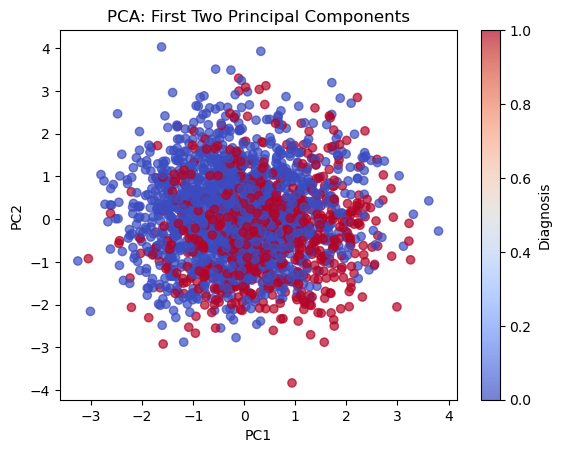

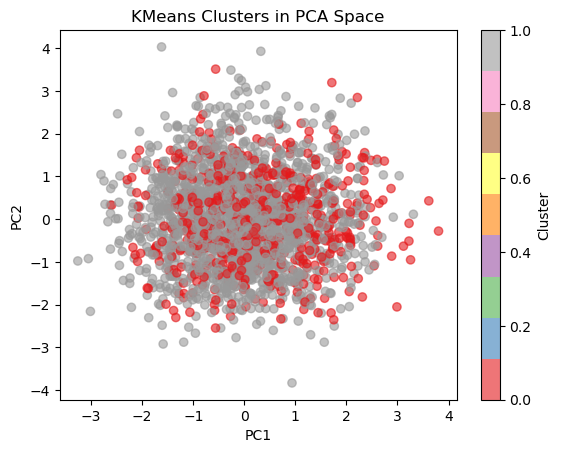

In [20]:
# K- means clustering
# Exclude target column
features = df.drop('Diagnosis', axis=1)

# Select only numeric columns
features = features.select_dtypes(include=[float, int])
print(features.dtypes)

features = df.drop('Diagnosis', axis=1)
# Should be all float64 columns now

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Diagnosis'], cmap='coolwarm', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Diagnosis')
plt.show()

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='Set1', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters in PCA Space')
plt.colorbar(label='Cluster')
plt.show()


<span style="color:darkred; font-size:28px; font-weight:bold;">5. Modeling</span>

<span style="color:slateblue; font-size:16px;">
In this step, we build classifiers to predict whether a patient has Alzheimer's disease based on health, lifestyle, and clinical features. Using supervised learning, we fit our models on prepared data and evaluate their predictive performance.

The main classification algorithm used is <b>Logistic Regression</b>—a widely used linear model for binary classification. To improve results and capture non-linear feature interactions, we also train a <b>Random Forest Classifier</b> as an alternative model for comparison.
</span>


In [5]:
# LOGISTIC REGRESSION
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load and prepare data
df = pd.read_csv('alzheimers_disease_data.csv')
df = df.drop(columns=['DoctorInCharge', 'PatientID'])
df = df.fillna(df.median(numeric_only=True))
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
num_cols = df.select_dtypes(include='number').columns.drop('Diagnosis')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Feature/target split
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Test Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



In [6]:
# RANDOM FOREST CLASSIFIER
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load and prepare data
df = pd.read_csv('alzheimers_disease_data.csv')
df = df.drop(columns=['DoctorInCharge', 'PatientID'])
df = df.fillna(df.median(numeric_only=True))
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
num_cols = df.select_dtypes(include='number').columns.drop('Diagnosis')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Feature/target split
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Test Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)


Test Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



<span style="color:darkred; font-size:24px; font-weight:bold;">Results</span>

<span style="color:slateblue; font-size:16px;">
Two classification models were trained and evaluated:

<b>Logistic Regression</b>
Test Accuracy: 0.83  
Precision/Recall (Alzheimer’s): 0.79 / 0.71  
Precision/Recall (No Alzheimer’s): 0.85 / 0.90

<b>Random Forest Classifier</b>
Test Accuracy: 0.93  
Precision/Recall (Alzheimer’s): 0.96 / 0.84  
Precision/Recall (No Alzheimer’s): 0.92 / 0.98

The Random Forest model outperformed Logistic Regression, achieving higher accuracy and better recall for Alzheimer's disease detection. This suggests that ensemble methods capture complex clinical feature interactions better than linear models for this prediction task.
</span>


<span style="color:darkred; font-size:28px; font-weight:bold;">6. Evaluation</span>

<span style="color:slateblue; font-size:16px;">
In this step, we evaluate the performance of our classifiers using standard metrics such as accuracy, precision, recall, and F1-score. Comparing the Logistic Regression and Random Forest models helps us determine which approach is best suited for predicting Alzheimer's disease in this dataset.
</span>


Logistic Regression Results:
Accuracy: 0.827906976744186
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



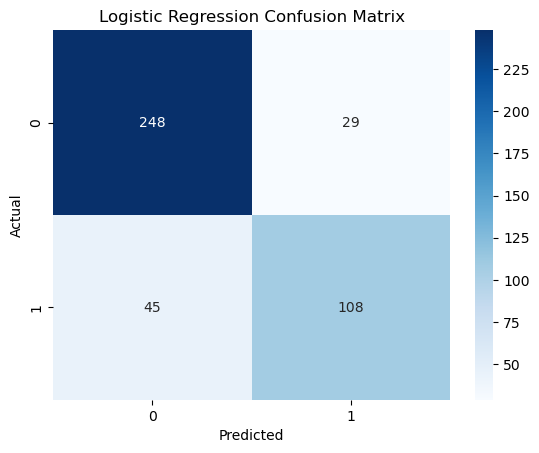

Random Forest Results:
Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



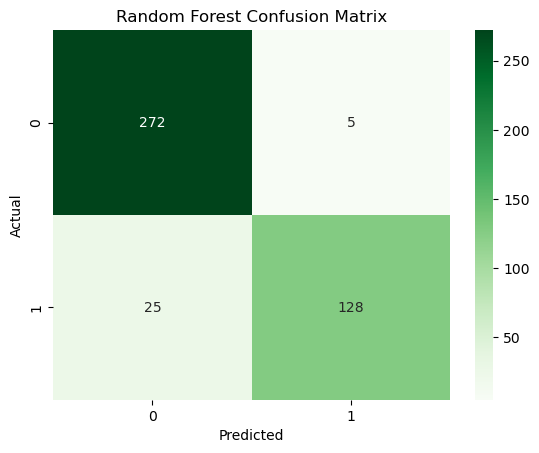

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test, y_pred (from Logistic Regression) and y_pred_rf (from Random Forest) are defined

# Logistic Regression Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<span style="color:darkred; font-size:28px; font-weight:bold;">7. Deployment</span>

<span style="color:slateblue; font-size:16px;">
In this step, the trained Random Forest model is saved for future predictions and can be integrated into a clinical decision support system or web application. Deployment enables clinicians and researchers to apply the model to new patient data efficiently.
</span>


In [8]:
!pip install gradio




In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load the dataset
df = pd.read_csv('alzheimers_disease_data.csv')

# Select only the 6 key features
features = [
    'Age',
    'Gender',
    'BMI',
    'MMSE',
    'FamilyHistoryAlzheimers',
    'Smoking',
    'Diagnosis'
]

df_small = df[features]
X = df_small.drop(columns=['Diagnosis'])
y = df_small['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf_small = RandomForestClassifier(n_estimators=100, random_state=42)
rf_small.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_small.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")
print("Classification Report:\n", report)

# Save the model for Gradio/Streamlit demo
joblib.dump(rf_small, 'alzheimers_rf_small.pkl')


Test Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.78      0.71       277
           1       0.39      0.25      0.31       153

    accuracy                           0.60       430
   macro avg       0.52      0.52      0.51       430
weighted avg       0.56      0.60      0.57       430



['alzheimers_rf_small.pkl']

In [10]:
import gradio as gr
import joblib
import numpy as np

# Load the deployment model you trained on 6 features
rf_small = joblib.load('alzheimers_rf_small.pkl')

def predict_func(Age, Gender, BMI, MMSE, FamilyHistoryAlzheimers, Smoking):
    features = np.array([Age, Gender, BMI, MMSE, FamilyHistoryAlzheimers, Smoking]).reshape(1, -1)
    result = rf_small.predict(features)[0]
    return "Alzheimer's" if result == 1 else "No Alzheimer's"

interface = gr.Interface(
    fn=predict_func,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Gender (0=Male, 1=Female)"),
        gr.Number(label="BMI"),
        gr.Number(label="MMSE"),
        gr.Number(label="Family History of Alzheimer's (0=No, 1=Yes)"),
        gr.Number(label="Smoking (0=No, 1=Yes)")
    ],
    outputs="label"
)

interface.launch('share=True')


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warni